In [1]:
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from atlas_ml.datasets.data_pipeline import DataPipeline
from atlas_ml.deeplearning.vq_vae import VQVAE

In [2]:
vq_vae = VQVAE(
    input_channels=1, 
    output_channels=1, 
    hidden_dims=[16, 32, 64], 
    codebook_dim=128, 
    img_size=28, 
    latent_dim=64, 
    scale_factor=3, 
    expansion_factor=3
)
dataset_config = {'batch_size':128, 'val_split':0.2, 'num_workers':2, 'pin_memory':True}
train_dl, val_dl = DataPipeline(configs=dataset_config).get_dataset() # default is mnist

In [3]:
vq_vae.train_model(
    train_dataloader=train_dl,
    val_dataloader=val_dl,
    optimizer=torch.optim.Adam,
    criterion=nn.MSELoss,
    epochs=20,
    lr=3e-4,
    device='cuda'
)

  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 1.0, 'After 15 Epochs')

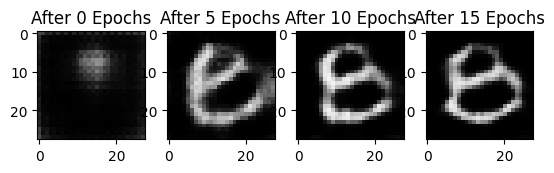

In [5]:
img_epoch_0 = cv2.imread(r'C:\Users\tommy\Developer\atlas-ml\atlas_ml\deeplearning\notebooks\sample_0.png')
img_epoch_5 = cv2.imread(r'C:\Users\tommy\Developer\atlas-ml\atlas_ml\deeplearning\notebooks\sample_5.png')
img_epoch_10 = cv2.imread(r'C:\Users\tommy\Developer\atlas-ml\atlas_ml\deeplearning\notebooks\sample_10.png')
img_epoch_15 = cv2.imread(r'C:\Users\tommy\Developer\atlas-ml\atlas_ml\deeplearning\notebooks\sample_15.png')

_, ax = plt.subplots(1,4)
ax[0].imshow(img_epoch_0)
ax[0].set_title('After 0 Epochs')
ax[1].imshow(img_epoch_5)
ax[1].set_title('After 5 Epochs')
ax[2].imshow(img_epoch_10)
ax[2].set_title('After 10 Epochs')
ax[3].imshow(img_epoch_15)
ax[3].set_title('After 15 Epochs')